# LOGISTIC REGRESSION

## CON FILTRO <40

In [2]:
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(max_iter=10000,random_state=18)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, balanced_accuracy_score
import pickle

In [27]:
with open("Data/train_data_40.pkl",'rb') as f:
    over_train_data_40 = pickle.load(f)

In [28]:
train_labels_40 = over_train_data_40['MVP']
train_data_40= over_train_data_40.drop('MVP', axis = 1)

In [29]:
C = uniform(loc=0, scale=1)
solver = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
scoring = ['precision', 'f1', 'roc_auc']

rs_parameters_40 = {'C': C,
                 'solver' : solver,
                 }

In [11]:
#cross validation usando solo il train RandomSearchCV
rs_40=RandomizedSearchCV(log_reg, rs_parameters_40, scoring=scoring, refit="f1", n_jobs=-1, n_iter=250, random_state=756)
rs_lr_40 = rs_40.fit(train_data_40, train_labels_40)

In [13]:
print("The best score is",rs_lr_40.best_score_)
print("The best parameters are", rs_lr_40.best_params_)


The best parameters are {'C': 0.9442714194028784, 'solver': 'sag'}


Output Orfeo:

The best score is 0.9967138225402532
The best parameters are {'C': 0.9442714194028784, 'solver': 'sag'}


In [30]:
#fit su train con pramaetri trovati
log_reg_final_40=LogisticRegression(solver="sag",C=0.9443,class_weight="balanced", max_iter=10000,n_jobs=-1, random_state=13)
# log_reg_final_40=LogisticRegression(solver="linear",C=0.23927,class_weight="balanced", max_iter=10000,n_jobs=-1, random_state=13)

In [31]:
log_reg_final_40.fit(train_data_40, train_labels_40)

LogisticRegression(C=0.9443, class_weight='balanced', max_iter=10000, n_jobs=-1,
                   random_state=13, solver='sag')

In [32]:
with open("log_reg_40.pkl",'wb') as f:
    pickle.dump(log_reg_final_40,f)

In [33]:
with open("Data/test_data_40.pkl",'rb') as f:
    test_data_40 = pickle.load(f)

test_labels_40 = test_data_40["MVP"]
test_data_40=test_data_40.drop(["PLAYER_AGE", "PLAYER_ID", "SEASON_ID", "TEAM_ID", "MVP"], axis=1)

#predict su test
pred_lr_40 = log_reg_final_40.predict(test_data_40)

In [34]:
print(f"The accuracy of the Logistic Regressor is  {accuracy_score(test_labels_40,pred_lr_40)}")

The accuracy of the Logistic Regressor is  0.9924741298212606


In [35]:
#valutazione della prediction
confusion_matrix(test_labels_40,pred_lr_40)


array([[1051,    7],
       [   1,    4]])

In [36]:

print(classification_report(test_labels_40,pred_lr_40))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      1058
         1.0       0.36      0.80      0.50         5

    accuracy                           0.99      1063
   macro avg       0.68      0.90      0.75      1063
weighted avg       1.00      0.99      0.99      1063



## SENZA FILTRO <40

In [3]:
with open("Data/train_data_40.pkl",'rb') as f:
    over_train_data = pickle.load(f)
over_train_data

,CONF_RANK,GP,MIN,FGM,FG_PCT,FG3M,FG3_PCT,FTM,FT_PCT,OREB,DREB,AST,STL,BLK,TOV,PF,MVP
0,11.0,1.061693,-0.119103,-0.804056,-0.851466,-0.083988,0.513777,-0.656053,-0.609235,-0.418386,-0.604227,0.875702,0.332874,-0.474307,0.346161,0.113817,0.0
1,3.0,0.916591,1.327875,1.000258,0.371106,0.060592,0.240151,-0.276922,0.010603,1.095248,1.144614,-0.598077,-0.432955,3.133158,0.234276,1.527391,0.0
2,10.0,1.151057,1.282931,0.597085,0.323190,-0.968518,-1.701272,1.041533,-0.525131,2.979430,1.804387,-0.593676,-0.367852,0.035528,0.197661,0.847596,0.0
3,8.0,1.339054,0.285814,0.279456,2.021417,-1.018246,-1.940444,0.568313,-2.170711,1.566251,0.926916,-0.545670,0.505416,0.921342,0.346725,1.458267,0.0
4,7.0,1.211111,1.019403,0.576835,0.022614,0.621414,0.883383,0.155058,-0.277593,-0.353048,-0.337738,0.503166,0.490319,-0.335345,0.328475,0.105308,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5560,1.0,0.531684,1.041313,3.174418,1.093516,0.305242,-0.027353,3.274286,-0.873566,1.601043,4.180938,1.620866,0.575591,1.201927,2.673184,1.398873,1.0
5561,1.0,0.866890,1.530578,2.604262,0.829267,0.499925,0.818753,3.181437,1.359722,0.842447,2.840656,0.907313,0.177828,1.024584,1.258816,0.494903,1.0
5562,1.0,0.649512,1.484675,2.878362,1.807304,0.411505,0.228397,3.016993,-0.060862,0.822981,2.850022,2.390732,1.960962,1.567780,2.436355,0.522188,1.0
5563,1.0,0.811144,1.611496,2.833875,1.158572,0.738725,0.911167,2.970420,0.940432,0.579925,2.550693,1.611073,0.980557,0.851758,1.549357,0.044448,1.0


In [4]:
train_labels = over_train_data['MVP']
train_data= over_train_data.drop('MVP', axis = 1)

In [5]:
C = uniform(loc=0, scale=1)
solver = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
scoring = ['precision', 'f1', 'roc_auc']

rs_parameters = {'C': C,
                 'solver' : solver,
                 }

In [15]:
#PROVARE CON N_ITER=SIZE(TRAIN_DATA_40) --> DOVREBBE ESSERE LEAVE ONE OUT CV
rs=RandomizedSearchCV(log_reg, rs_parameters, scoring="balanced_accuracy", n_jobs=-1, n_iter=250, random_state=756)
rs_lr = rs.fit(train_data, train_labels)

In [16]:
print("The best score is",rs_lr.best_score_)
print("The best parameters are", rs_lr.best_params_)

The best score is 0.9982717989002357
The best parameters are {'C': 0.9442714194028784, 'solver': 'sag'}


In [5]:
#fit su train con pramaetri trovati
# log_reg_final=LogisticRegression(solver="sag",C=0.9443,class_weight="balanced", max_iter=10000,n_jobs=-1, random_state=13) # test 0.20
log_reg_final=LogisticRegression(solver="sag",C=0.9443,class_weight="balanced", max_iter=10000,n_jobs=-1, random_state=13) # test 0.3

In [6]:
log_reg_final.fit(train_data, train_labels)

LogisticRegression(C=0.9443, class_weight='balanced', max_iter=10000, n_jobs=-1,
                   random_state=13, solver='sag')

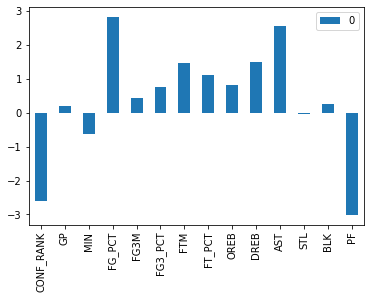

In [36]:
import matplotlib.pyplot as plt
importance_log_reg = log_reg_final.coef_[0]
a = pd.DataFrame(data=importance_log_reg, index=train_data.columns)

a.plot(kind="bar")
plt.savefig('plot/log_reg_importance.png', bbox_inches='tight')

In [7]:
log_reg_final.

LogisticRegression(C=0.9443, class_weight='balanced', max_iter=10000, n_jobs=-1,
                   random_state=13, solver='sag')

In [6]:
with open("log_reg.pkl",'wb') as f:
    pickle.dump(log_reg_final,f)

In [7]:
with open("Data/test_data.pkl",'rb') as f:
    test_data = pickle.load(f)

test_labels = test_data["MVP"]
test_data=test_data.drop(["PLAYER_AGE", "PLAYER_ID", "SEASON_ID", "TEAM_ID", "MVP"], axis=1)

In [8]:
pred_lr = log_reg_final.predict(test_data)



print(f"The accuracy of the Logistic Regressor is  {balanced_accuracy_score(test_labels,pred_lr)}")

The accuracy of the Logistic Regressor is  0.9987174789300111


In [9]:
#valutazione della prediction
confusion_matrix(test_labels,pred_lr)

array([[2722,    7],
       [   0,    5]])

In [25]:
print(classification_report(test_labels,pred_lr))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2729
         1.0       0.42      1.00      0.59         5

    accuracy                           1.00      2734
   macro avg       0.71      1.00      0.79      2734
weighted avg       1.00      1.00      1.00      2734



## Senza feature selection (pearson correlation)

In [3]:
with open("Data/train_data_no_pearson.pkl",'rb') as f:
    over_train_data = pickle.load(f)

In [4]:
train_labels = over_train_data['MVP']
train_data= over_train_data.drop('MVP', axis = 1)

In [5]:
C = uniform(loc=0, scale=1)
solver = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
scoring = ['precision', 'f1', 'roc_auc']

rs_parameters = {'C': C,
                 'solver' : solver,
                 }

In [6]:
#PROVARE CON N_ITER=SIZE(TRAIN_DATA_40) --> DOVREBBE ESSERE LEAVE ONE OUT CV
rs=RandomizedSearchCV(log_reg, rs_parameters, scoring=scoring, refit="f1", n_jobs=-1, n_iter=250, random_state=756)
rs_lr = rs.fit(train_data, train_labels)

In [7]:
print("The best score is",rs_lr.best_score_)
print("The best parameters are", rs_lr.best_params_)

The best score is 0.9965778637772565
The best parameters are {'C': 0.9442714194028784, 'solver': 'sag'}


In [8]:
#fit su train con pramaetri trovati
log_reg_final=LogisticRegression(solver="sag",C=0.9443,class_weight="balanced", max_iter=10000,n_jobs=-1, random_state=13)

In [9]:
log_reg_final.fit(train_data, train_labels)

LogisticRegression(C=0.9443, class_weight='balanced', max_iter=10000, n_jobs=-1,
                   random_state=13, solver='sag')

In [10]:
with open("log_reg_no_pearson.pkl",'wb') as f:
    pickle.dump(log_reg_final,f)

In [13]:
with open("Data/test_data_no_pearson.pkl",'rb') as f:
    test_data = pickle.load(f)

test_labels = test_data["MVP"]
test_data=test_data.drop(["PLAYER_AGE", "PLAYER_ID", "SEASON_ID", "TEAM_ID", "MVP"], axis=1)

In [14]:
pred_lr = log_reg_final.predict(test_data)



print(f"The accuracy of the Logistic Regressor is  {accuracy_score(test_labels,pred_lr)}")

The accuracy of the Logistic Regressor is  0.9983543609434997


In [15]:
#valutazione della prediction
confusion_matrix(test_labels,pred_lr)

array([[1815,    3],
       [   0,    5]])

In [16]:
print(classification_report(test_labels,pred_lr))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1818
         1.0       0.62      1.00      0.77         5

    accuracy                           1.00      1823
   macro avg       0.81      1.00      0.88      1823
weighted avg       1.00      1.00      1.00      1823

